# INRIA Person Dataset (piotr version)

http://pascal.inrialpes.fr/data/human/

http://www.vision.caltech.edu/Image_Datasets/CaltechPedestrians/datasets/INRIA/

    

In [2]:
%load_ext autoreload
%autoreload 2

import os
import util

In [9]:
basepath="/home/facundo/datasets/pedestrian/inria-piotr/"
annotations_basepath=os.path.join(basepath,'annotations')
output_folderpath="/home/facundo/datasets/pedestrian/inria-piotr/outputs"
if not os.path.exists(output_folderpath):
    os.mkdir(output_folderpath)
sets=[f for f in os.listdir(basepath) if os.path.isdir(os.path.join(basepath, f)) and f.startswith('set')]
print(sets)
filepaths=[]
prefixes=[]
for set_foldername in sets:
    set_folderpath=os.path.join(basepath,set_foldername)
    seq_files=os.listdir(set_folderpath)
    for seq_filename in seq_files:
        filename,ext=os.path.splitext(seq_filename)
        filepath=os.path.join(set_folderpath,seq_filename)
        prefix="%s_%s" % (set_foldername,filename)
        prefixes.append(prefix)
        filepaths.append(filepath)

print(filepaths,prefixes)
for i in range(len(filepaths)):
    images=util.seq_to_img(filepaths[i],prefixes[i],output_folderpath)

['set00', 'set01']
['/home/facundo/datasets/pedestrian/inria-piotr/set00/V001.seq', '/home/facundo/datasets/pedestrian/inria-piotr/set00/V000.seq', '/home/facundo/datasets/pedestrian/inria-piotr/set01/V001.seq', '/home/facundo/datasets/pedestrian/inria-piotr/set01/V000.seq'] ['set00_V001', 'set00_V000', 'set01_V001', 'set01_V000']


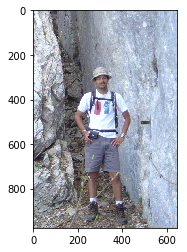

In [76]:
import scipy.io

set_index="00"
volume_index="000"
annotations_filepath=os.path.join(annotations_basepath,'set%s/V%s.vbb' % (set_index,volume_index))
mat = scipy.io.loadmat(annotations_filepath)

In [170]:
data=mat['A']
print(data.dtype)


nFrame=data['nFrame'][0][0][0][0]
objLists=data['objLists'][0][0][0]
print("There are %d images in dataset set=%s - vol=%s." % (nFrame,set_index,volume_index))

# print(objLists[0][0])
objStr=data['objStr'][0][0][0]
objInit=data['objInit'][0][0][0]
objEnd=data['objEnd'][0][0][0]
objLbl=data['objLbl'][0][0][0]
maxObj=data['maxObj'][0][0][0][0]
log=data['log'][0][0][0][0]
logLen=data['logLen'][0][0][0][0]
altered=data['altered'][0][0][0][0]


index=10



[('nFrame', 'O'), ('objLists', 'O'), ('maxObj', 'O'), ('objInit', 'O'), ('objLbl', 'O'), ('objStr', 'O'), ('objEnd', 'O'), ('objHide', 'O'), ('altered', 'O'), ('log', 'O'), ('logLen', 'O')]
There are 614 images in dataset set=00 - vol=000.
(1, 2)
[('id', 'O'), ('pos', 'O'), ('posv', 'O'), ('occl', 'O'), ('lock', 'O')]
[[array([[23]], dtype=uint8) array([[24]], dtype=uint8)]]
(1, 2)


lbl,init,end: 40 1 40
Label: ['person']
(1, 4)
[[ (array([[91]], dtype=uint8), array([[ 144.445,  237.   ,  234.11 ,  571.   ]]), array([[0, 0, 0, 0]], dtype=uint8), array([[0]], dtype=uint8), array([[1]], dtype=uint8))
  (array([[92]], dtype=uint8), array([[ 134.99,  315.  ,   91.02,  222.  ]]), array([[0, 0, 0, 0]], dtype=uint8), array([[0]], dtype=uint8), array([[1]], dtype=uint8))
  (array([[93]], dtype=uint8), array([[  74.8,  292. ,   98.4,  240. ]]), array([[0, 0, 0, 0]], dtype=uint8), array([[0]], dtype=uint8), array([[1]], dtype=uint8))
  (array([[94]], dtype=uint8), array([[ 292.325,  310.   ,   96.35 ,  235.   ]]), array([[0, 0, 0, 0]], dtype=uint8), array([[0]], dtype=uint8), array([[1]], dtype=uint8))]]
[[array([[91]], dtype=uint8) array([[92]], dtype=uint8)
  array([[93]], dtype=uint8) array([[94]], dtype=uint8)]]
(1, 4)
(1, 4)
[array([[91]], dtype=uint8) array([[92]], dtype=uint8)
 array([[93]], dtype=uint8) array([[94]], dtype=uint8)]


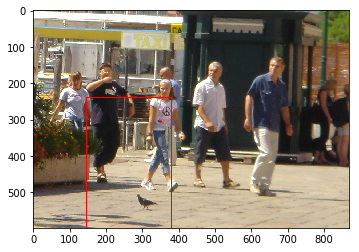

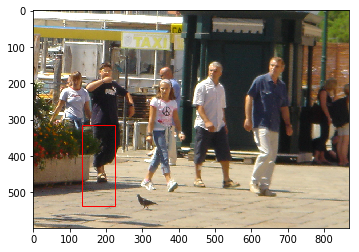

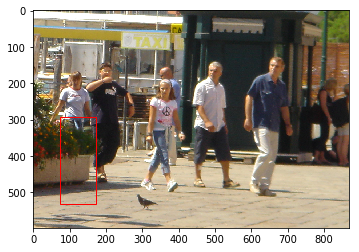

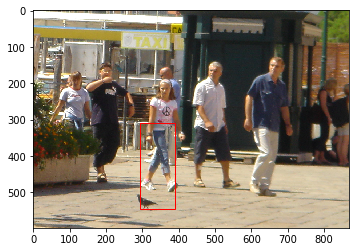

In [250]:
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
import matplotlib.patches as patches
import skimage.io
import numpy as np
sample_index=60#350

print("lbl,init,end:",objStr[sample_index],objInit[sample_index],objEnd[sample_index])
print("Label:",objLbl[sample_index])
print(objLists[sample_index].shape)
print(objLists[sample_index])
print(objLists[sample_index]["id"])
print(objLists[sample_index]['pos'].shape)


objects=objLists[sample_index]
print(objects.shape)
objects=objects[0,:]
num_objects=len(objects)
print(objects["id"])
for i in range(num_objects):
    index_str="%05d" % (sample_index)
    image_rgb=skimage.io.imread(os.path.join(output_folderpath,"set%s_V%simg%s.png" % (set_index,volume_index,index_str)))
    #image_rgb=np.flip(image_rgb,0)
#     image_rgb=np.flip(image_rgb,1)
    h,w,c=image_rgb.shape
    ax=plt.imshow(image_rgb)
    object_info=objects[i]
    bounding_box=np.squeeze(object_info[1])
    rect = patches.Rectangle((bounding_box[0],bounding_box[1]),bounding_box[2],bounding_box[3],linewidth=1,edgecolor='r',facecolor='none')
    ax=plt.gca()
    ax.add_patch(rect)
    plt.show()